In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
h, w = img.shape[0], img.shape[1]

ker = [[-2, -1], [-2, 0], [-2, 1],
            [-1, -2], [-1, -1], [-1, 0], [-1, 1], [-1, 2],
            [0, -2], [0, -1], [0, 0], [0, 1], [0, 2],
            [1, -2], [1, -1], [1, 0], [1, 1], [1, 2],
            [2, -1], [2, 0], [2, 1]]
J_ker = [[0, -1], [0, 0], [1, 0]]
K_ker = [[-1, 0], [-1, 1], [0, 1]]

In [11]:
def show_result(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [12]:
#generate a binary image (threshold at 128)
def binarize():
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            if img[i][j] < 128:
                new_img[i][j] = 0
            else:
                new_img[i][j] = 255
    return new_img

In [13]:
def dilation(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            if (img[i][j] == 255):
                for k in range(21):
                    x = i + ker[k][0]
                    y = j + ker[k][1]
                    if (x >= 0 and x < h and y >= 0 and y < w):
                        new_img[x][y] = 255
    return new_img

In [14]:
def erosion(img, ker, ker_size):
    new_img = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            fail = 0
            for k in range(ker_size):
                x = i + ker[k][0]
                y = j + ker[k][1]
                if (x < 0 or x >= h or y < 0 or y >= w):
                    fail = 1
                elif img[x][y] != 255:
                    fail =  1
            if (not fail):
                new_img[i][j] = 255
    return new_img

In [15]:
def opening(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return dilation(erosion(new_img, ker, 21))

In [16]:
def closing(img):
    new_img = np.zeros([h, w], dtype=img.dtype)
    new_img = img
    return erosion(dilation(new_img), ker, 21)

In [17]:
def hit_and_miss(img, J_ker, K_ker):
    # img_comp is the complement of img_bin
    new_img = np.zeros([h, w], dtype=img.dtype)
    img_comp = np.zeros([h, w], dtype=img.dtype)
    img1 = np.zeros([h, w], dtype=img.dtype)
    img2 = np.zeros([h, w], dtype=img.dtype)
    for i in range(h):
        for j in range(w):
            img_comp[i][j] = 255 - img[i][j]
    img1 = erosion(img, J_ker, 3)
    img2 = erosion(img_comp, K_ker, 3)
    for i in range(h):
        for j in range(w):
            if (img1[i][j] == 255 and img2[i][j] == 255):
                new_img[i][j] = 255
    return new_img

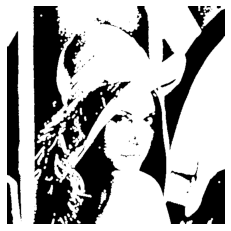

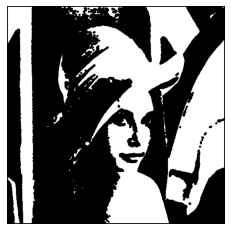

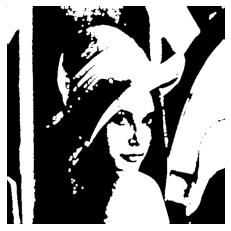

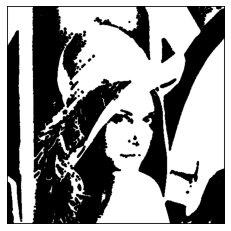

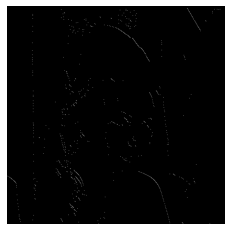

In [18]:
binary_img = binarize()
show_result(dilation(binary_img))
show_result(erosion(binary_img, ker, 21))
show_result(opening(binary_img))
show_result(closing(binary_img))
show_result(hit_and_miss(binary_img, J_ker, K_ker))